In [1]:
import sys
import os
from tempfile import mkdtemp

import numpy as np
from process_bigraph import Composite
from process_bigraph.experiments.parameter_scan import RunProcess


sys.path.insert(0, '..')


from biosimulator_processes.processes.amici_process import UtcAmici
from biosimulator_processes.processes.copasi_process import UtcCopasi

from biosimulator_processes.io import read_report_outputs
from biosimulator_processes.helpers import plot_utc_outputs

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [2]:
omex_dir = './examples/sbml-core/Elowitz-Nature-2000-Repressilator'
omex_fp = omex_dir + '.omex'
sbml_fp = os.path.join(omex_dir, 'BIOMD0000000012_url.xml')
sedml_fp = os.path.join(omex_dir, 'simulation.sedml')
reports_path = os.path.join(omex_dir, 'reports.h5')

Configure and create an Amici UTC instance using just the archive filepath.

In [3]:
utc_amici = UtcAmici(config={'model': {'model_source': omex_dir + '.omex'}})

2024-05-29 16:14:34.635 - amici.sbml_import - INFO - Finished importing SBML                         (3.87E-02s)
2024-05-29 16:14:34.684 - amici.sbml_import - INFO - Finished processing SBML observables            (4.48E-02s)
2024-05-29 16:14:34.688 - amici.sbml_import - INFO - Finished processing SBML event observables      (5.42E-07s)
2024-05-29 16:14:34.710 - amici.de_model - INFO - Finished computing xdot                            (3.40E-03s)
2024-05-29 16:14:34.717 - amici.de_model - INFO - Finished computing x0                              (2.97E-03s)
2024-05-29 16:14:34.735 - amici.de_model - INFO - Finished computing w                               (1.50E-02s)
2024-05-29 16:14:35.409 - amici.de_export - INFO - Finished generating cpp code                      (6.68E-01s)
2024-05-29 16:14:44.339 - amici.de_export - INFO - Finished compiling cpp code                       (8.93E+00s)


In [4]:
# t range parameters set via sedml introspection within archive contents:
utc_amici.t[0], utc_amici.t[-1], utc_amici.duration, utc_amici.step_size, utc_amici.num_steps

(400.0, 600.0, 600, 1.0, 600)

In [5]:
# you can verify this time config against the SEDML file
!cat ./examples/sbml-core/Elowitz-Nature-2000-Repressilator/simulation.sedml

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version3" level="1" version="3"
  xmlns:sbml="http://www.sbml.org/sbml/level2/version3">
  <listOfModels>
    <model id="model" language="urn:sedml:language:sbml" source="BIOMD0000000012_url.xml">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id='PX']/@initialAmount" newValue="0"/>
      </listOfChanges>
    </model>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="simulation" initialTime="0" outputStartTime="400" outputEndTime="1000" numberOfPoints="600">
      <algorithm kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task" modelReference="model" simulationReference="simulation"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="data_gen_time" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> var_time </ci>
      </ma

In [6]:
# run the amici utc simulation with the interface's update method:
amici_results = utc_amici.update()

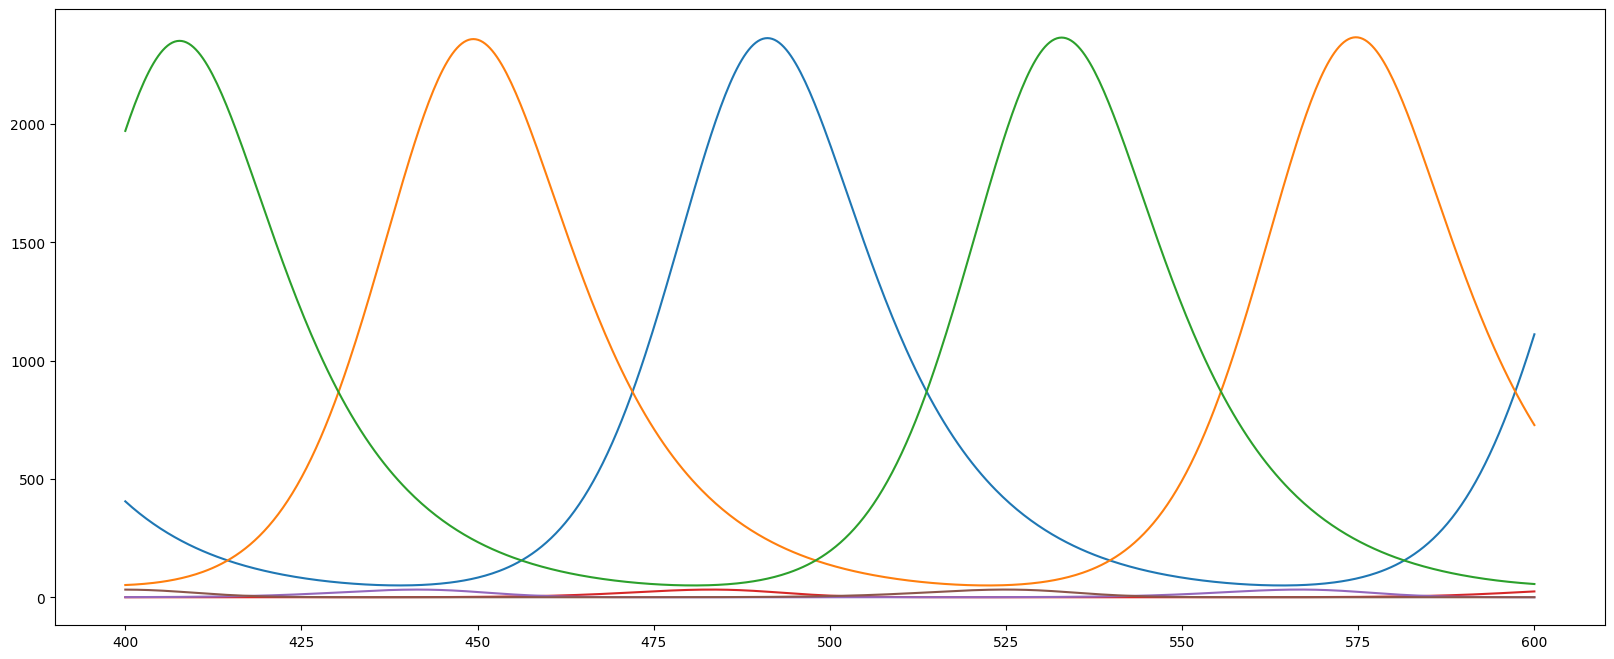

In [7]:
# use built-in plot to plot results
utc_amici.plot_results()

Now create a `CopasiUtc` instance and extract/visualize results as with the amici process.

In [13]:
amici_results

{}

In [8]:
utc_copasi = UtcCopasi(config={'model': {'model_source': omex_dir + '.omex'}})

In [9]:
copasi_results = utc_copasi.update()

copasi_results['time'].shape

(600,)

In [12]:
list(utc_copasi.results['floating_species'].keys())[0]

'LacI protein'

In [22]:
utc_amici.results

{}

In [11]:
utc_copasi.plot_results()

ValueError: All arrays must be of the same length

<Figure size 2000x800 with 0 Axes>

Finally, optionally generate a "ground truth" which we include in the comparison. The default source for ground-truth data is via uploading an omex archive as model source. The report outputs must be included in the archive.

In [ ]:
# Generate comparison matrix from ground truth
from biosimulator_processes.api.compare import generate_comparison

In [ ]:
published_results = read_report_outputs(reports_path)

type(published_results)

In [ ]:
published_results.data

In [ ]:
published_species_outputs = []
for report_output in published_results.data:
    if not report_output.dataset_label.lower() == 'time':
        published_species_outputs.append({report_output.dataset_label: report_output.data})

In [ ]:
published_species_outputs